<a href="https://www.kaggle.com/code/mindoflogicalfire/titanic1?scriptVersionId=138544268" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Titanic Classification :

## Make a system which tells whether the person will be save from sinking. What factors were most likely lead to success-socio-economic status, age, gender and more.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.simplefilter('ignore')

In [4]:
df= pd.read_csv('/kaggle/input/titanic/train.csv')
df_test=pd.read_csv('/kaggle/input/titanic/test.csv')



In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.isna().sum(),df_test.isna().sum()

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64,
 PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64)

In [9]:
df.columns,df_test.columns

(Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'),
 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
        'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'))

In [10]:
df.drop(['Cabin'],axis=1,inplace=True)
df_test.drop(['Cabin'],axis=1,inplace=True)

In [11]:
# Imoutation techinique
## 1 mean value imoutation 

# imputation techinique
## 1 mean value imoutation 

<Axes: xlabel='Age', ylabel='Density'>

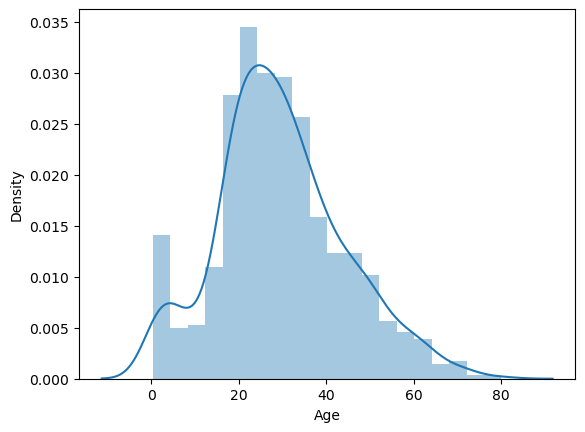

In [12]:
# plt.hist(df.Age)
sns.distplot(df.Age)

<Axes: xlabel='Age', ylabel='Density'>

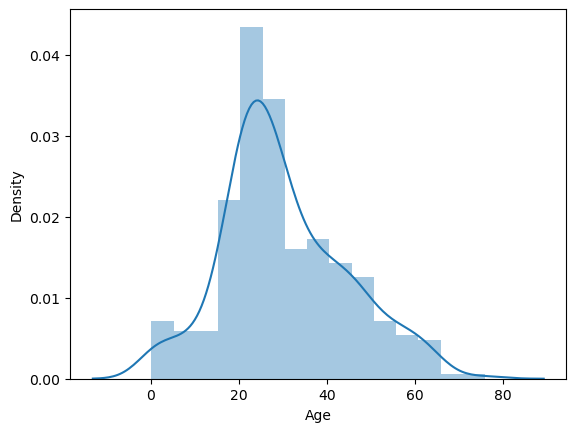

In [13]:
sns.distplot(df_test.Age)

In [14]:
df.Age.isnull().sum()

177

In [15]:
df['Age_mean']=df['Age'].fillna(df['Age'].mean())
df_test['Age_mean']=df_test['Age'].fillna(df['Age'].mean())

In [16]:
df[['Age_mean','Age']]

,Age_mean,Age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


<Axes: xlabel='Age_mean', ylabel='Density'>

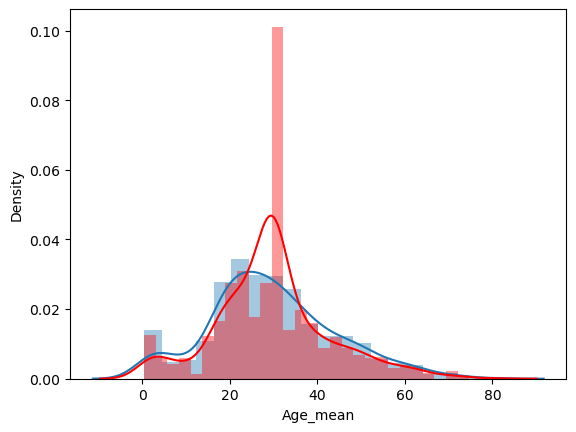

In [17]:
import seaborn as sns
sns.distplot(df['Age'])
sns.distplot(df['Age_mean'],color='r')

<Axes: xlabel='Age_mean', ylabel='Density'>

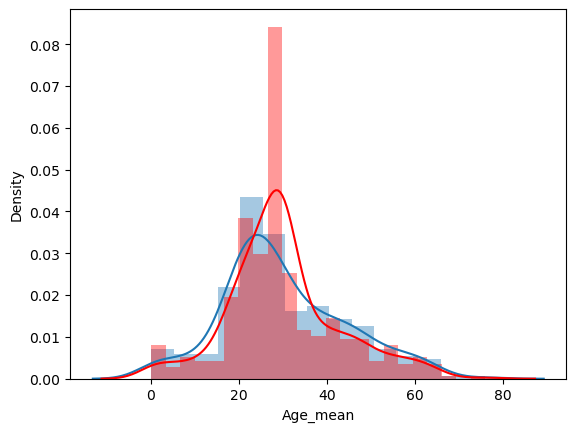

In [18]:
sns.distplot(df_test['Age'])
sns.distplot(df_test['Age_mean'],color='r')

## 2. Median value imputation
### if you have outlieirs in data set


In [19]:
# df['Age_Median']=df.Age.fillna(df['Age'].median())

In [20]:
# df[['Age_Median','Age']]

In [21]:
# import seaborn as sns
# sns.distplot(df['Age'])
# sns.distplot(df['Age_Median'],color='y')

In [22]:
##

In [23]:
df.info()
df.drop('Age',axis=1,inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
 11  Age_mean     891 non-null    float64
dtypes: float64(3), int64(5), object(4)
memory usage: 83.7+ KB


In [24]:
df_test.info()
df_test.drop('Age',axis=1,inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     418 non-null    object 
 10  Age_mean     418 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 36.0+ KB


In [25]:
df.info(),df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
 10  Age_mean     891 non-null    float64
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name    

(None, None)

## 3. mode value imputation

### use in categorical value


In [26]:
df[df['Embarked'].isnull()]


,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age_mean
61,62,1,1,"Icard, Miss. Amelie",female,0,0,113572,80.0,NaN,38.0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,0,0,113572,80.0,NaN,62.0


In [27]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [28]:
mode=df['Embarked'].mode()[0]

mode

'S'

In [29]:
df['Embarked_mode']=df['Embarked'].fillna(mode)

In [30]:
df['Embarked_mode'].isnull().sum()

0

In [31]:
df.drop(['Embarked','Ticket','Name'],inplace=True,axis=1)


In [32]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare',
       'Age_mean', 'Embarked_mode'],
      dtype='object')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Sex            891 non-null    object 
 4   SibSp          891 non-null    int64  
 5   Parch          891 non-null    int64  
 6   Fare           891 non-null    float64
 7   Age_mean       891 non-null    float64
 8   Embarked_mode  891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [34]:
df.rename({'Embarked_mode':'Embarked','Age_mean':'Age'},inplace=True,axis=1)
df

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked
0,1,0,3,male,1,0,7.2500,22.000000,S
1,2,1,1,female,1,0,71.2833,38.000000,C
2,3,1,3,female,0,0,7.9250,26.000000,S
3,4,1,1,female,1,0,53.1000,35.000000,S
4,5,0,3,male,0,0,8.0500,35.000000,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,0,0,13.0000,27.000000,S
887,888,1,1,female,0,0,30.0000,19.000000,S
888,889,0,3,female,1,2,23.4500,29.699118,S
889,890,1,1,male,0,0,30.0000,26.000000,C


In [35]:
df_test.rename({'Age_mean':'Age'},inplace=True,axis=1)

In [36]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Age          891 non-null    float64
 8   Embarked     891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


In [38]:
df['Embarked'].unique()

array([0, 1, 2])

In [39]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Embarked     418 non-null    object 
 9   Age          418 non-null    float64
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [40]:
df_test['Sex'] = df_test['Sex'].map({'male': 0, 'female': 1})
df_test['Embarked'] = df_test['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Embarked     418 non-null    int64  
 9   Age          418 non-null    float64
dtypes: float64(2), int64(6), object(2)
memory usage: 32.8+ KB


<Axes: xlabel='Fare', ylabel='Density'>

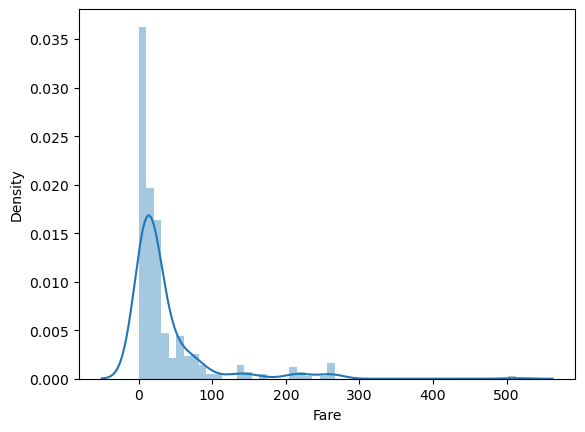

In [41]:
sns.distplot(df_test['Fare'])

In [42]:
import numpy as np
dfFare=np.log(df_test['Fare'])

In [43]:
FareMode=df_test['Fare'].median()

In [44]:
df['Fare']=df['Fare'].fillna(FareMode)
df_test['Fare']=df_test['Fare'].fillna(FareMode)

In [45]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         418 non-null    float64
 8   Embarked     418 non-null    int64  
 9   Age          418 non-null    float64
dtypes: float64(2), int64(6), object(2)
memory usage: 32.8+ KB


In [46]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare',
       'Age', 'Embarked'],
      dtype='object')

In [47]:
df_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked', 'Age'],
      dtype='object')

In [48]:
x=df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y=df['Survived']

In [49]:
# Split the data into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [52]:
y_pred=model.predict(X_val)

In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_val)

0.7988826815642458

In [54]:
x_test=df_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y_testPred=model.predict(x_test)

In [55]:
y_testPred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [56]:
submmision=df_test.join(pd.DataFrame(y_testPred))

In [57]:
submmision.rename({0:'Survived'},axis=1,inplace=True)

In [58]:
submmision[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked','Survived']]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,0,34.500000,0,0,7.8292,2,0
1,3,1,47.000000,1,0,7.0000,0,0
2,2,0,62.000000,0,0,9.6875,2,0
3,3,0,27.000000,0,0,8.6625,0,0
4,3,1,22.000000,1,1,12.2875,0,1
...,...,...,...,...,...,...,...,...
413,3,0,29.699118,0,0,8.0500,0,0
414,1,1,39.000000,0,0,108.9000,1,1
415,3,0,38.500000,0,0,7.2500,0,0
416,3,0,29.699118,0,0,8.0500,0,0


In [59]:
submmision['Sex'] = submmision['Sex'].map({0:'male', 1:'female'})
submmision['Embarked'] = submmision['Embarked'].map({0:'S', 1:'C', 2:'Q'})


In [60]:
submmision[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked','Survived']]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,34.500000,0,0,7.8292,Q,0
1,3,female,47.000000,1,0,7.0000,S,0
2,2,male,62.000000,0,0,9.6875,Q,0
3,3,male,27.000000,0,0,8.6625,S,0
4,3,female,22.000000,1,1,12.2875,S,1
...,...,...,...,...,...,...,...,...
413,3,male,29.699118,0,0,8.0500,S,0
414,1,female,39.000000,0,0,108.9000,C,1
415,3,male,38.500000,0,0,7.2500,S,0
416,3,male,29.699118,0,0,8.0500,S,0


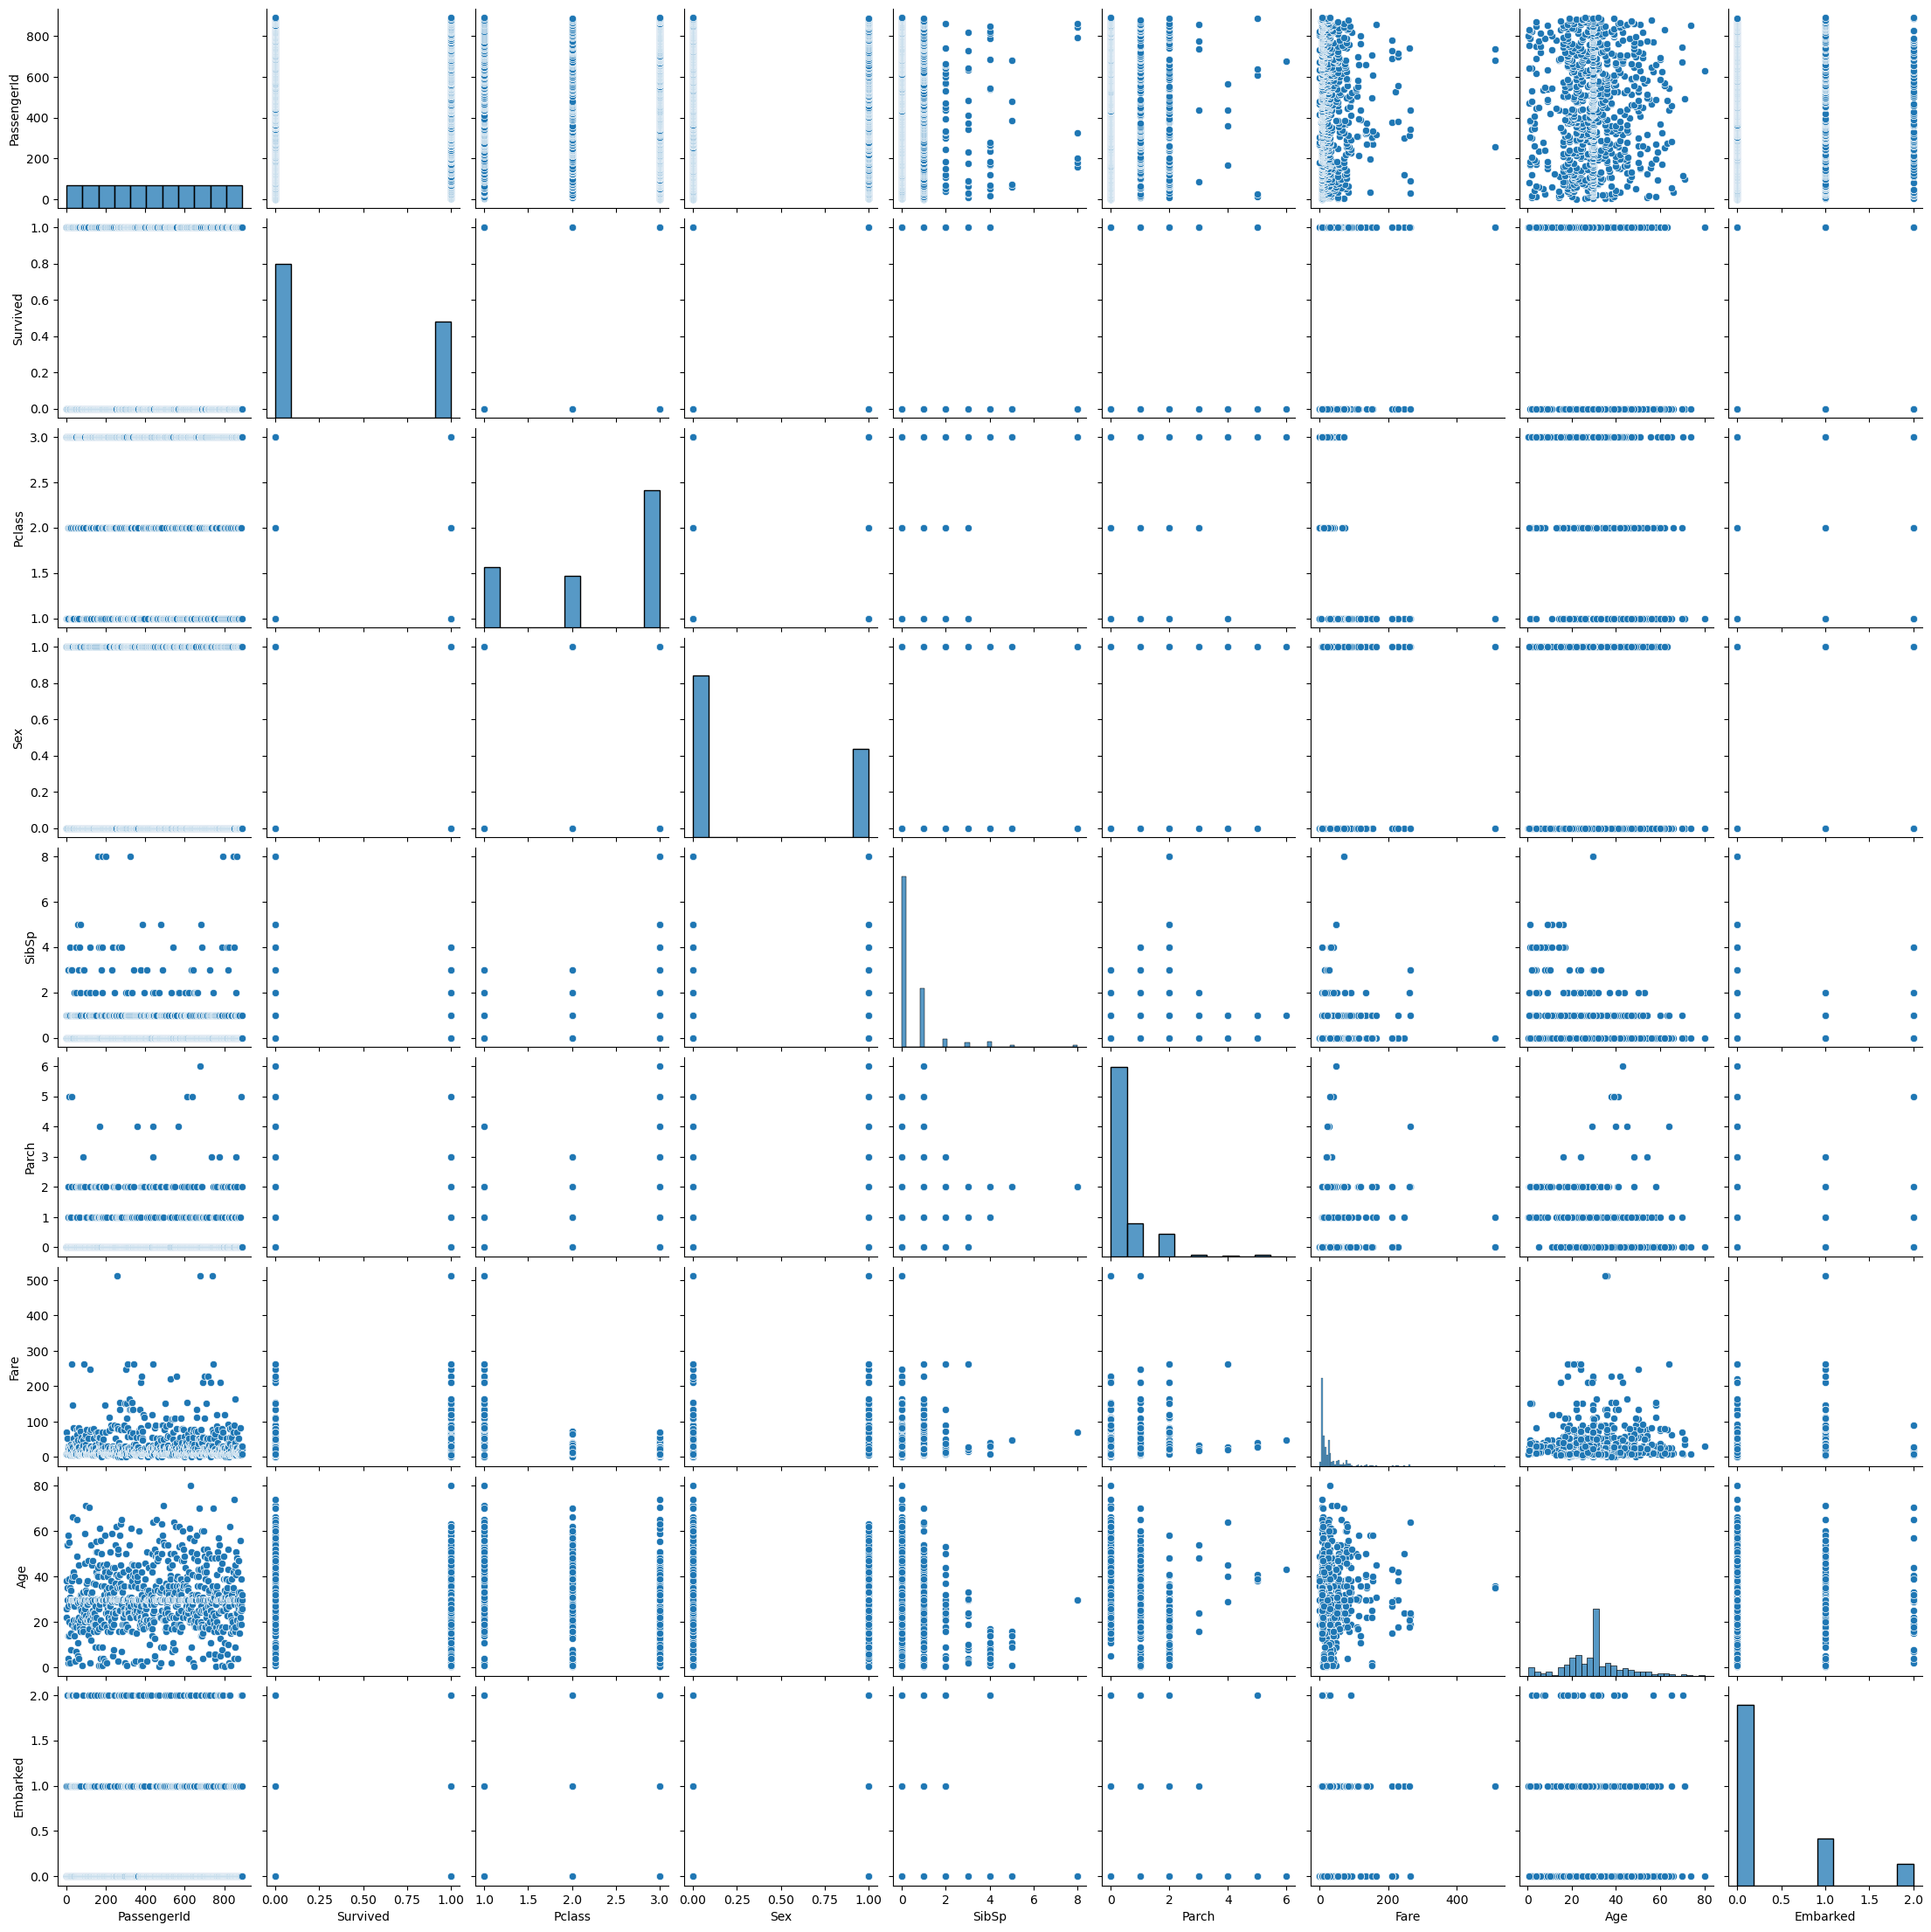

In [61]:
sns.pairplot(df)

<Axes: >

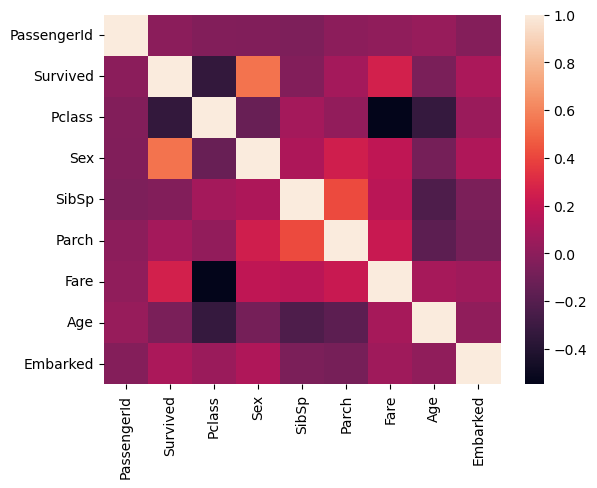

In [62]:
sns.heatmap(df.corr())

we can see that fare, sex is highly corelated to survived column

In [63]:
df.corr()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,-0.057527,-0.001652,0.012658,0.033207,-0.030467
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.035322,0.081629,0.257307,-0.069809,0.106811
Pclass,-0.035144,-0.338481,1.000000,-0.131900,0.083081,0.018443,-0.549500,-0.331339,0.045702
Sex,-0.042939,0.543351,-0.131900,1.000000,0.114631,0.245489,0.182333,-0.084153,0.116569
SibSp,-0.057527,-0.035322,0.083081,0.114631,1.000000,0.414838,0.159651,-0.232625,-0.059961
Parch,-0.001652,0.081629,0.018443,0.245489,0.414838,1.000000,0.216225,-0.179191,-0.078665
Fare,0.012658,0.257307,-0.549500,0.182333,0.159651,0.216225,1.000000,0.091566,0.062142
Age,0.033207,-0.069809,-0.331339,-0.084153,-0.232625,-0.179191,0.091566,1.000000,0.007461
Embarked,-0.030467,0.106811,0.045702,0.116569,-0.059961,-0.078665,0.062142,0.007461,1.000000
